# Business Problem Understanding 


#### Dream Housing Finance commpany deal in all kinds of home loans. They have presence across all urban, semi  urban and rural areas. Customer first applices for home loan and after that company validates the customer eligibility for loan. 

#### Company wants to automate the loan eligibility process (real time ) based on customer detail provided while filling online application from. these details are Gnder, Marital Status, Education, Number of Dependent, Income, loan Amount, Credit History and others.To automate this process, they have provded a datase to identify the customers segmnts that are eligible for lone amount so that they can specifically target these customers.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
sahani = pd.read_csv("D:\LoanData.csv")
sahani.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
sahani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
sahani.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Understandinng

In [5]:
sahani['Loan_ID'].nunique()

614

In [6]:
sahani.drop(columns=['Loan_ID'],inplace=True)

In [7]:
sahani['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
sahani['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
sahani['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

In [10]:
sahani['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
sahani["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
sahani['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
 sahani['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
sahani['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
sahani['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [16]:
sahani['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [17]:
sahani['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
sahani['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
sahani['Credit_History'].unique()

array([ 1.,  0., nan])

In [20]:
sahani['Credit_History'] = sahani['Credit_History'].replace({1:"good",0:"bad"})

In [21]:
sahani['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [22]:
sahani['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [23]:
sahani['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [24]:
sahani['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
sahani['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [26]:
continous = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

discrete_categorical = ['Gender', 'Married',  'Education', 'Self_Employed','Credit_History','Property_Area', 'Loan_Status']

discrete_count = ['Dependents', 'Loan_Amount_Term']
                        

# Exploratory Data Analysis(EDA)

#### for continous Variable

In [27]:
sahani[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


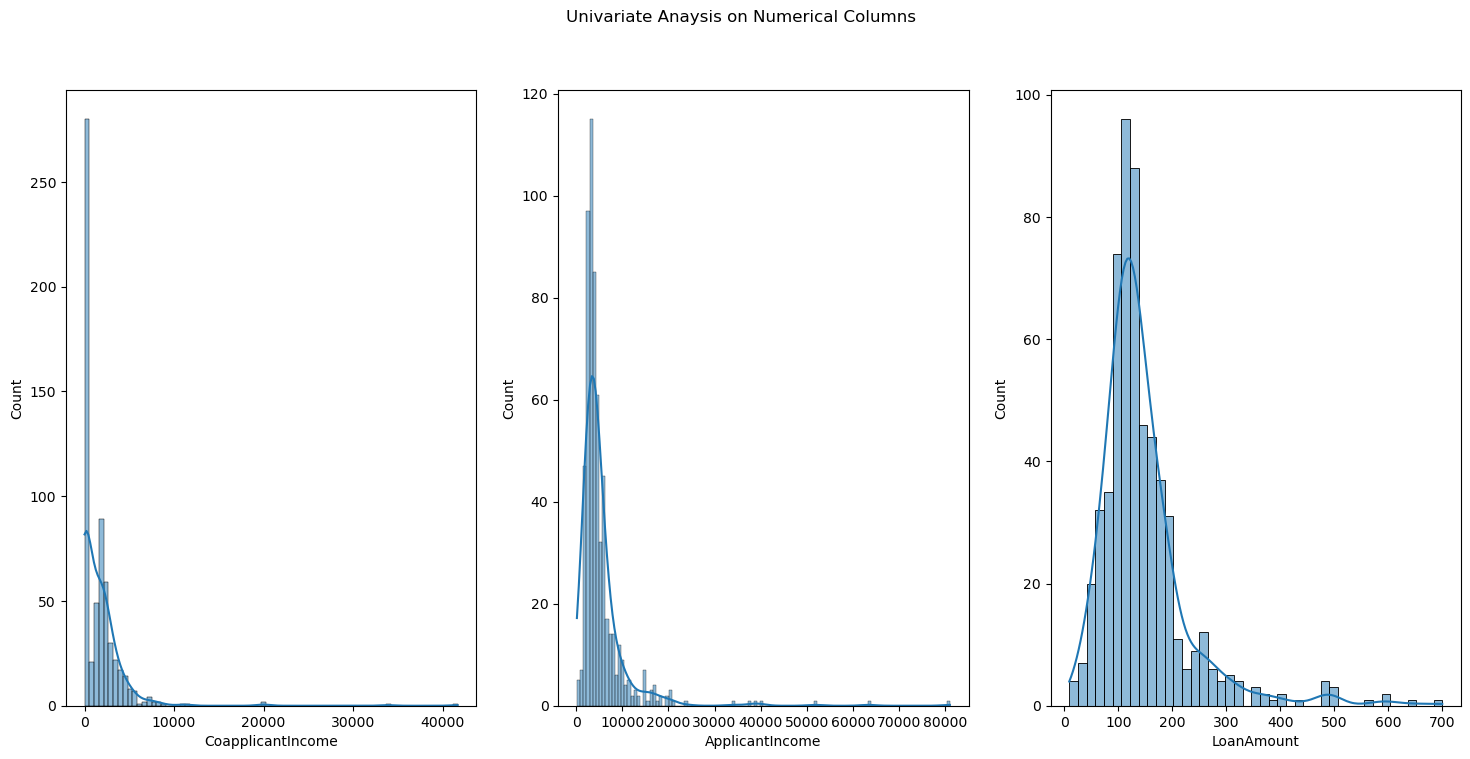

In [28]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,3,2)
sns.histplot(sahani['ApplicantIncome'],kde=True)

plt.subplot(1,3,1)
sns.histplot(sahani['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(sahani['LoanAmount'], kde=True)

plt.suptitle('Univariate Anaysis on Numerical Columns')
plt.show()

In [29]:
sahani[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

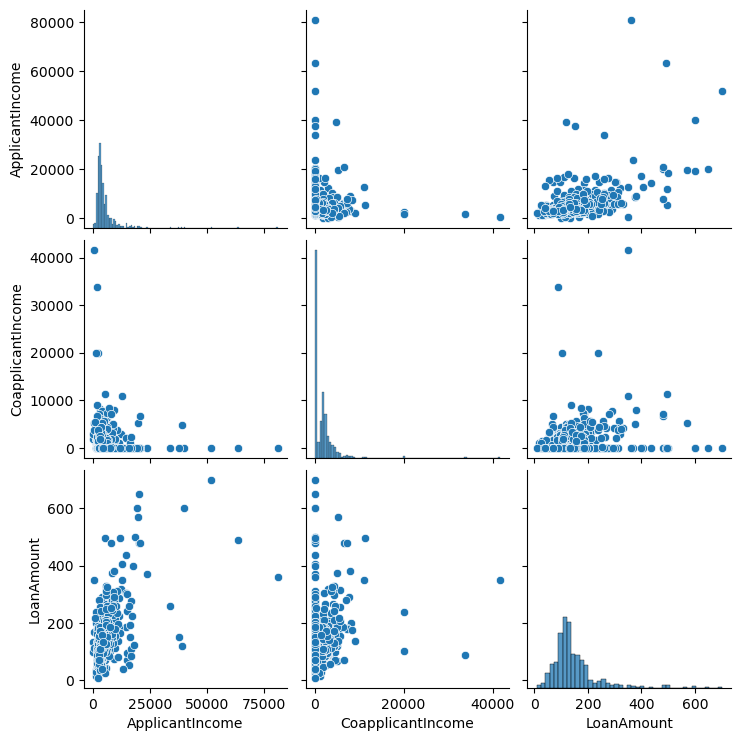

In [30]:
sns.pairplot(sahani[continous])
plt.show()

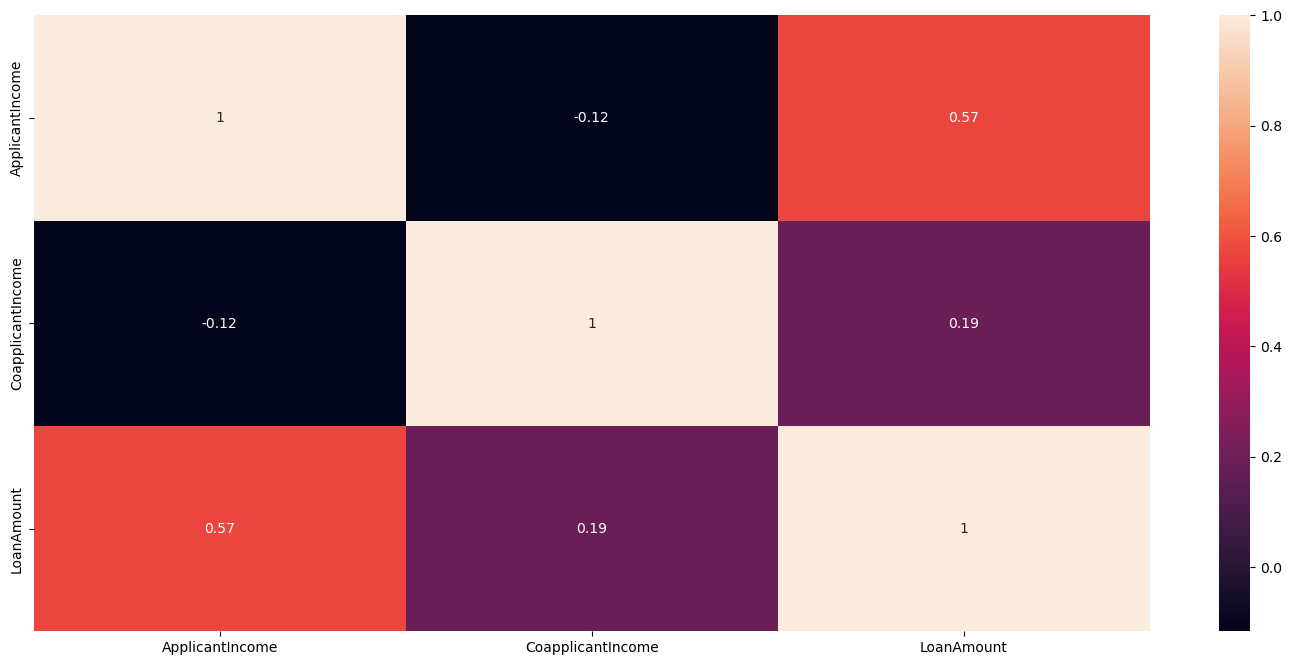

In [31]:
sns.heatmap(sahani[continous].corr(),annot=True)
plt.show()

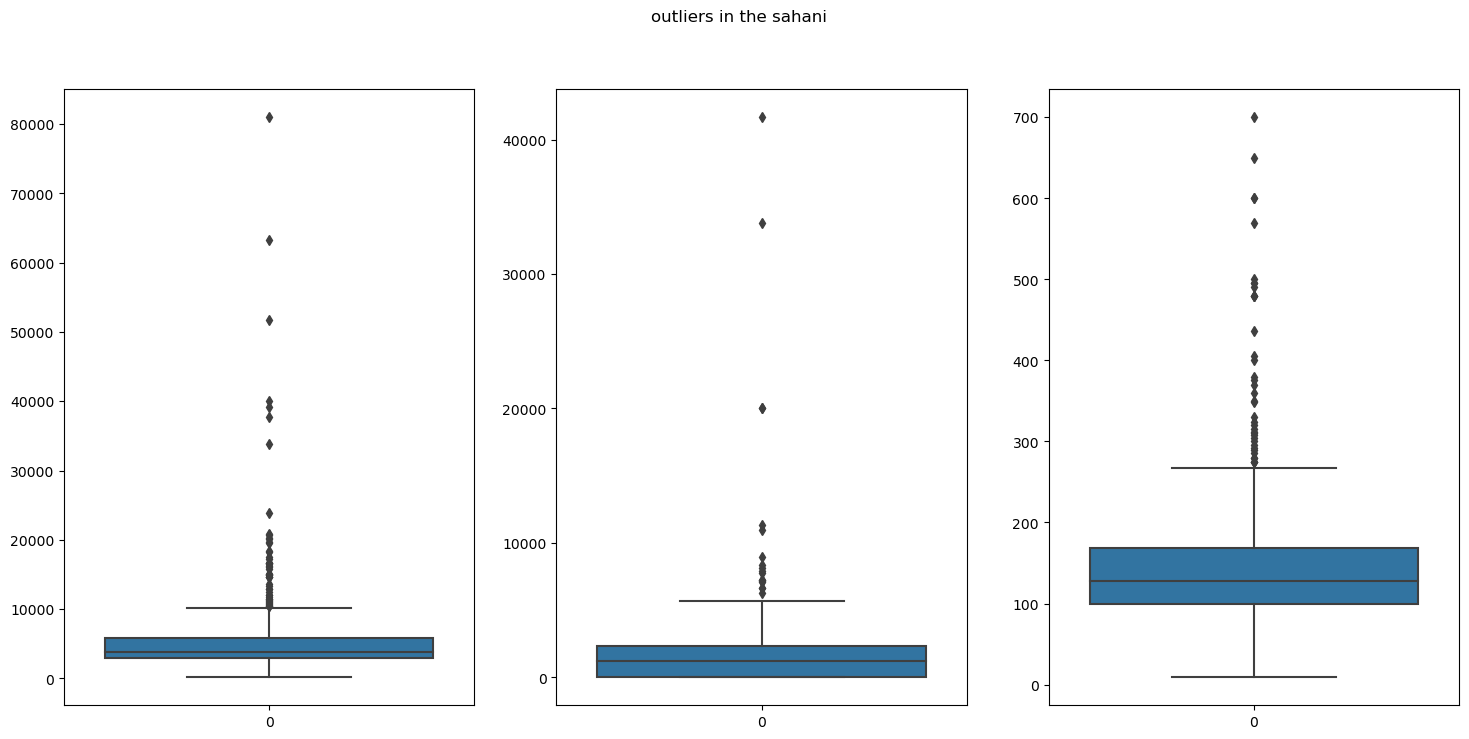

In [32]:
plt.subplot(1,3,1)
sns.boxplot(sahani['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(sahani['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(sahani['LoanAmount'])

plt.suptitle('outliers in the sahani')
plt.show()

#### for Discrete Varibles

In [33]:
sahani[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


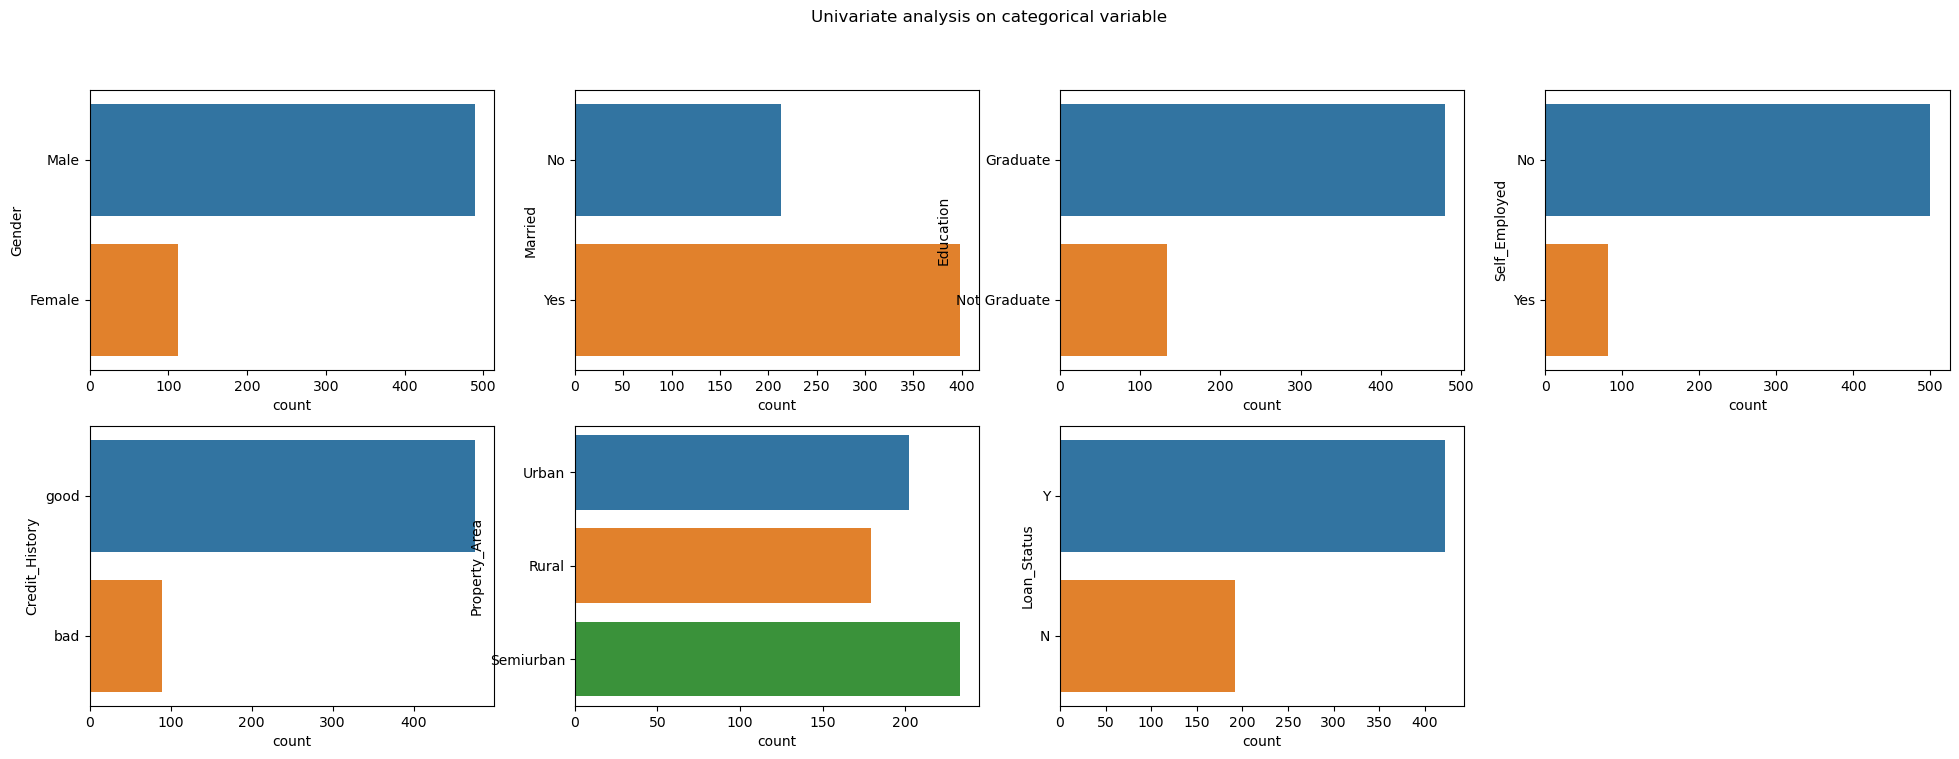

In [34]:
plt.figure(figsize=(24,8))

plt.subplot(2,4,1)
sns.countplot(y=sahani['Gender'])

plt.subplot(2,4,2)
sns.countplot(y=sahani['Married'])

plt.subplot(2,4,3)
sns.countplot(y=sahani['Education'])

plt.subplot(2,4,4)
sns.countplot(y=sahani['Self_Employed'])

plt.subplot(2,4,5)
sns.countplot(y=sahani['Credit_History'])

plt.subplot(2,4,6)
sns.countplot(y=sahani['Property_Area'])

plt.subplot(2,4,7)
sns.countplot(y=sahani['Loan_Status'])

plt.suptitle('Univariate analysis on categorical variable')
plt.show()

# Data Preparation

In [35]:
sahani["Income"] = sahani['ApplicantIncome'] + sahani['CoapplicantIncome']

sahani.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

## Modifying the wrong data

In [36]:
sahani['Dependents'] = sahani['Dependents'].replace({'3+':3})

### Missing Values Treatment

In [37]:
sahani.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [38]:
sahani.isnull().sum()/len(sahani)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [39]:
sahani = sahani.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

In [40]:
sahani['Dependents'] = sahani['Dependents'].fillna(0)

In [41]:
sahani['Gender'] = sahani['Gender'].fillna(sahani['Gender'].mode()[0])
sahani['Married']= sahani['Married'].fillna(sahani['Married'].mode()[0])
sahani['Self_Employed'] = sahani['Self_Employed'].fillna(sahani['Self_Employed'].mode()[0])

In [42]:
sahani.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [43]:
sahani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    object 
 1   Married           529 non-null    object 
 2   Dependents        529 non-null    object 
 3   Education         529 non-null    object 
 4   Self_Employed     529 non-null    object 
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    object 
 8   Property_Area     529 non-null    object 
 9   Loan_Status       529 non-null    object 
 10  Income            529 non-null    float64
dtypes: float64(3), object(8)
memory usage: 49.6+ KB


In [44]:
sahani['Property_Area'].value_counts()

Semiurban    209
Urban        165
Rural        155
Name: Property_Area, dtype: int64

In [45]:
sahani['Property_Area'].nunique()


3

#### Encoding

In [46]:
sahani['Gender'] = sahani['Gender'].map({'Male':1,'Female':0}).astype('int')
sahani['Married'] = sahani['Married'].map({'Yes':1,'No':0}).astype('int')
sahani['Education'] = sahani['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
sahani['Self_Employed'] = sahani['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
sahani['Property_Area'] = sahani['Property_Area'].map({'Rural':0,'Semiurban':1, 'Urban':2}).astype('int')
sahani['Credit_History'] = sahani['Credit_History'].map({'good':1,'bad':0}).astype('int')
sahani['Loan_Status'] = sahani['Loan_Status'].map({'Y':1,'N':0}).astype('int')

#### data type conversion

In [47]:
sahani['Dependents']           =sahani['Dependents'].astype('int')
sahani['Loan_Amount_Term']     =sahani['Loan_Amount_Term'].astype('int')


#### transformations

In [48]:
sahani[['Income', 'LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [49]:
from scipy.stats import boxcox

sahani['Income'], a = boxcox(sahani['Income'])
sahani['LoanAmount'], c = boxcox(sahani['LoanAmount'])


In [50]:
sahani[['Income', 'LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [51]:
sahani['Loan_Amount_Term'] = sahani['Loan_Amount_Term']/12

## x&y

In [52]:
X = sahani.drop('Loan_Status',axis=1)
y = sahani['Loan_Status']

#### identify the best random state number

In [53]:
train = []
test = []
cv=[]
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr_model = LogisticRegression()
    lr_model.fit(X_train,y_train)

    # Prediction
    train_pred = lr_model.predict(X_train)
    test_pred = lr_model.predict(X_test)

    # Evaluation

    train.append(lr_model.score(X_train,y_train))
    test.append(lr_model.score(X_test,y_test))
    cv.append(cross_val_score(lr_model,X,y,cv=5).mean())
em = pd.DataFrame({"Train":train,"test":test,"CV":cv})
gm = em[(abs(em['Train']-em['test'])<=0.05) & abs(em['test']-em['CV']<=0.05)]
gm[gm['test']==gm['test'].max()].index.tolist()[0]

16

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)

### Machine Learning Modelling & Evaluation

**1. Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.806146572104019
Cross validation score: [0.83529412 0.78823529 0.81176471 0.78571429 0.80952381]
Test Accuracy: 0.8490566037735849


# 2. KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.75177304964539
Cross validation score: [0.72941176 0.71764706 0.75294118 0.71428571 0.73809524]
Test Accuracy: 0.8113207547169812


## **3. Support Vector Machine (SVM)**

In [57]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_model = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_model.fit(X_train,y_train)

svm_model = svm_model.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.806146572104019
Cross validation score: [0.83529412 0.78823529 0.81176471 0.78571429 0.80952381]
Test Accuracy: 0.8490566037735849


## **4. Decision Tree Classifier**

In [58]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=16)
param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

# identify the best model
dt = dt_grid.best_estimator_

# identify the importance of each feature
dt_fi = dt.feature_importances_

# identify the feature where the feature importance is greater than 0
index = [i for i,x in enumerate(dt_fi)if x>0]

# crete new dataset with importance features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

# train with best model & with impotance features
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

# Evaluate the best model
print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(dt,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.83451536643026
Cross validation score: [0.82352941 0.78823529 0.85882353 0.78571429 0.78571429]
Test Accuracy: 0.8490566037735849


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

rf = RandomForestClassifier()

sahani_grid = GridSearchCV(rf, param_grid, cv=5)
sahani_grid.fit(X_train, y_train)

# Access the best estimator
best_rf_estimator = sahani_grid.best_estimator_


In [60]:
X_train_dt

,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
168,5.132078,40.0,0,1,1.852031
160,5.815384,30.0,1,1,1.856089
65,7.422117,30.0,1,1,1.869467
92,5.517040,30.0,1,2,1.863131
242,6.557014,5.0,1,2,1.868113
...,...,...,...,...,...
445,6.268459,30.0,1,0,1.862190
527,6.619989,30.0,0,1,1.865897
375,6.138816,15.0,1,2,1.864377
147,4.050366,30.0,1,2,1.856379


## 5. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=16)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i, x in enumerate(rf_fi)if x>0]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 1.0
Cross validation score: [0.81176471 0.78823529 0.82352941 0.77380952 0.73809524]
Test Accuracy: 0.8207547169811321


## **6. AdaBoost Classifier**

In [62]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=16)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i,x in enumerate(ab_fi) if x>0]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.8297872340425532
Cross validation score: [0.83529412 0.77647059 0.82352941 0.80952381 0.83333333]
Test Accuracy: 0.8301886792452831


## **7. Gradient Boost Classifier**

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=16)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
gb_grid.fit(X_train, y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i, x in enumerate(gb_fi) if x > 0]

X_train_gb = X_train.iloc[:, index]
X_test_gb = X_test.iloc[:, index]

gb.fit(X_train_gb, y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(gb, X_train_gb, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.8486997635933806
Cross-validation score: [0.82352941 0.77647059 0.84705882 0.78571429 0.80952381]
Test Accuracy: 0.839622641509434


## **8. XGBoost Classifier**

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined
estimator = XGBClassifier(random_state=16)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

xgb_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
xgb_grid.fit(X_train, y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

index = [i for i, x in enumerate(xgb_fi) if x > 0]

X_train_xgb = X_train.iloc[:, index]
X_test_xgb = X_test.iloc[:, index]

xgb.fit(X_train_xgb, y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(xgb, X_train_xgb, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.806146572104019
Cross-validation score: [0.83529412 0.78823529 0.81176471 0.78571429 0.80952381]
Test Accuracy: 0.8490566037735849


# Business Problem Understanding 

# Data Understandinng

# Exploratory Data Analysis(EDA)

# Data Preprocessing

# Encoding

# Identify The Best Random State Number

# Machine Learning Modelling & Evaluation


           #Modeling
    
#1. Logistic Regression

Train Accuracy: 0.806146572104019
Cross validation score: [0.81176471 0.78823529 0.81176471 0.78571429 0.73809524]
Test Accuracy: 0.8490566037735849

# 2. KNN 

Train Accuracy: 0.6926713947990544
Cross validation score: [0.65882353 0.65882353 0.68235294 0.69047619 0.72619048]
Test Accuracy: 0.7075471698113207

# 3. SVM

Train Accuracy: 0.789598108747045
Cross validation score: [0.77647059 0.76470588 0.81176471 0.72619048 0.80952381]
Test Accuracy: 0.8207547169811321
    
# 4.  Decision Tree Classifier
Train Accuracy: 0.83451536643026
Cross validation score: [0.82352941 0.78823529 0.85882353 0.78571429 0.78571429]
Test Accuracy: 0.8490566037735849
    
# 5. Randome Forest Classifier
Train Accuracy: 1.0
Cross validation score: [0.81176471 0.78823529 0.82352941 0.76190476 0.73809524]
Test Accuracy: 0.8207547169811321
    
# 6. AdaBoost Classifier    
Train Accuracy: 0.8297872340425532
Cross validation score: [0.83529412 0.77647059 0.82352941 0.80952381 0.83333333]
Test Accuracy: 0.8301886792452831
    
# 7. Gradient Boost Classifier
Train Accuracy: 0.8486997635933806
Cross-validation score: [0.82352941 0.77647059 0.84705882 0.78571429 0.80952381]
Test Accuracy: 0.839622641509434
    
# 8. XGBoost Classifier
Train Accuracy: 0.806146572104019
Cross-validation score: [0.83529412 0.78823529 0.81176471 0.78571429 0.80952381]
Test Accuracy: 0.8490566037735849